# Morning: Introduction to Time Series Analysis
The simplest demonstration of temporal dependence is seen by considering a univariate time series $y(t)$. In our case, $y(t)$ may be the surface-level atmsopheric concentration of ozone at a single EPA air-quality station in Orange County.

In [1]:
import numpy as np
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import statsmodels.api as sm
import matplotlib.pyplot as plt

r = robjects.r
nlme = importr('nlme')
stats = importr('stats')

## What generates the pattern?

## Is there a trend?

In [2]:
#-- Get El Nino data
sst = np.loadtxt('../Data/detrend.nino34.ascii.txt',skiprows=1)
y1 = sst[:,2]
t1 = np.linspace(1950,2017,len(y1))

#-- Convert Numpy arrays to R objects
robjects.globalenv["y2"] = robjects.FloatVector(y1)
robjects.globalenv["t2"] = robjects.FloatVector(t1)

#-- fit and display results
print r.summary(r.lm("y2 ~ t2"))


Call:
(function (formula, data, subset, weights, na.action, method = "qr", 
    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 
    contrasts = NULL, offset, ...) 
{
    ret.x <- x
    ret.y <- y
    cl <- match.call()
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (method == "model.frame") 
        return(mf)
    else if (method != "qr") 
        warning(gettextf("method = '%s' is not supported. Using 'qr'", 
            method), domain = NA)
    mt <- attr(mf, "terms")
    y <- model.response(mf, "numeric")
    w <- as.vector(model.weights(mf))
    if (!is.null(w) && !is.numeric(w)) 
        stop("'weights' must be a numeric vector")
    offset <- as.vector(model.offset(mf))
    if (!is.null(offset)) {
        if (length(offse

## Generate sample realizations

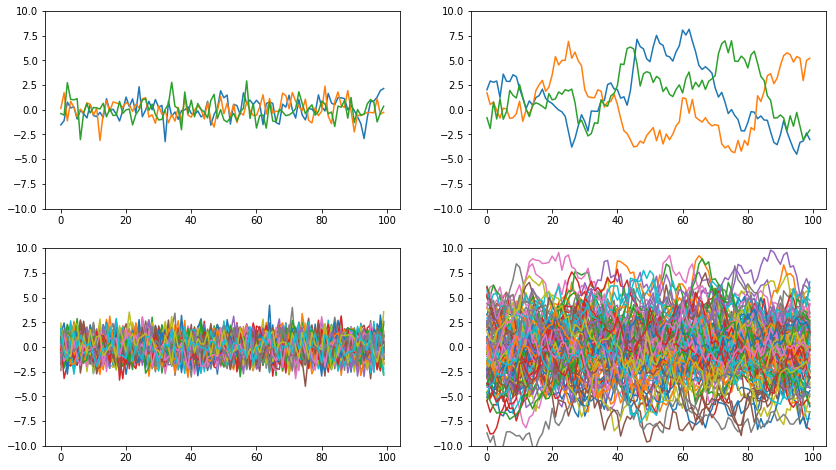

In [3]:
#-- Set up figure
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
#-- 3 sample curves
for i in range(3):
    ax1.plot(np.array(r.rnorm(100)))
    ax2.plot(np.array(stats.arima_sim(100,model=robjects.ListVector({'ar':0.95}))))
    ax1.set_ylim([-10,10])
    ax2.set_ylim([-10,10])
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
#-- 100 sample curves
for i in range(100):
    ax3.plot(np.array(r.rnorm(100)))
    ax4.plot(np.array(stats.arima_sim(100,model=robjects.ListVector({'ar':0.95}))))
    ax3.set_ylim([-10,10])
    ax4.set_ylim([-10,10])
plt.show()

## The autocorrelation function

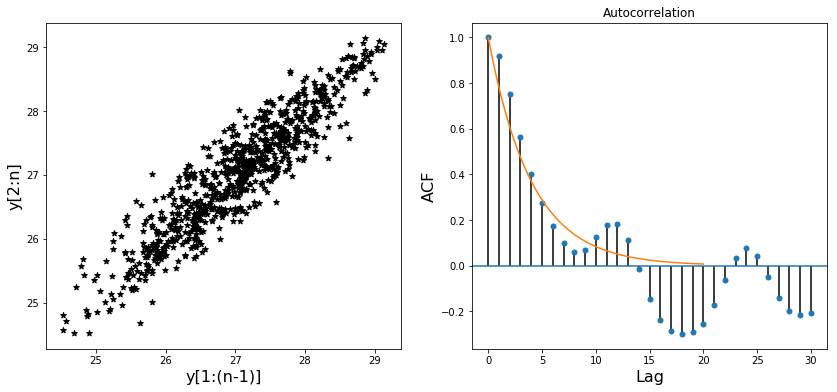

In [4]:
#-- Use the same sst data as above
n = len(y1) # number of elements

#-- Set up figure
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)

#-- Plot scatter plot of values shifted by 1
ax1.scatter(y1[1:(n-1)],y1[2:n],color='k',marker='*')
ax1.set_xlabel('y[1:(n-1)]',fontsize=16)
ax1.set_ylabel('y[2:n]',fontsize=16)

#-- plot autocorrelation
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_acf(y1,lags=30,alpha=None,ax=ax2)
ax2.plot(np.linspace(0,20),0.78**np.linspace(0,20))
ax2.set_xlabel('Lag', fontsize=16)
ax2.set_ylabel('ACF',fontsize=16)
plt.show()

## Generate various time series structures

## Simulation of slope estimation

## Simple trend analysis with autocorrelation

In [5]:
print r.summary(nlme.gls(r.formula("y2 ~ t2"), correlation=nlme.corAR1()))

Generalized least squares fit by REML
  Model: y2 ~ t2 
  Data: NULL 
       AIC      BIC    logLik
  637.1089 655.8723 -314.5545

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.9272067 

Coefficients:
               Value Std.Error   t-value p-value
(Intercept) 5.816964 16.795079 0.3463493  0.7292
t2          0.010672  0.008467 1.2603950  0.2079

 Correlation: 
   (Intr)
t2 -1    

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.4783251 -0.6540165  0.1030884  0.6908156  2.0707585 

Residual standard error: 0.9484359 
Degrees of freedom: 807 total; 805 residual



# MORNING BREAK

# Analysis of Orange Country ozone time series

# Simple trend analysis